In [1]:
!pip install torch==1.8.2+cpu torchvision==0.9.2+cpu torchaudio===0.8.2 -f https://download.pytorch.org/whl/lts/1.8/torch_lts.html

Looking in links: https://download.pytorch.org/whl/lts/1.8/torch_lts.html


In [2]:
!cd yolov5 & pip install -r requirements.txt

  Using cached PyYAML-6.0-cp37-cp37m-win_amd64.whl (153 kB)
  Using cached requests-2.26.0-py2.py3-none-any.whl (62 kB)
  Using cached tensorboard-2.7.0-py3-none-any.whl (5.8 MB)
  Using cached pandas-1.3.4-cp37-cp37m-win_amd64.whl (10.0 MB)
  Using cached seaborn-0.11.2-py3-none-any.whl (292 kB)
  Using cached thop-0.0.31.post2005241907-py3-none-any.whl (8.7 kB)
  Using cached charset_normalizer-2.0.7-py3-none-any.whl (38 kB)
  Using cached tensorboard_plugin_wit-1.8.0-py3-none-any.whl (781 kB)
  Using cached tensorboard_data_server-0.6.1-py3-none-any.whl (2.4 kB)
  Using cached google_auth-2.3.2-py2.py3-none-any.whl (155 kB)
  Using cached google_auth_oauthlib-0.4.6-py2.py3-none-any.whl (18 kB)
  Using cached rsa-4.7.2-py3-none-any.whl (34 kB)
  Using cached pyasn1_modules-0.2.8-py2.py3-none-any.whl (155 kB)
  Using cached cachetools-4.2.4-py3-none-any.whl (10 kB)
  Using cached requests_oauthlib-1.3.0-py2.py3-none-any.whl (23 kB)
  Using cached pyasn1-0.4.8-py2.py3-none-any.whl (77 

ERROR: tensorflow 1.14.0 has requirement tensorboard<1.15.0,>=1.14.0, but you'll have tensorboard 2.7.0 which is incompatible.
ERROR: Cannot uninstall 'PyYAML'. It is a distutils installed project and thus we cannot accurately determine which files belong to it which would lead to only a partial uninstall.


In [2]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

# --Load model--

In [3]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in C:\Users\Necati/.cache\torch\hub\ultralytics_yolov5_master


requirements: PyYAML>=5.3.1 not found and is required by YOLOv5, attempting auto-update...
requirements: Command 'pip install 'PyYAML>=5.3.1'' returned non-zero exit status 1.
requirements: requests>=2.23.0 not found and is required by YOLOv5, attempting auto-update...
requirements: Command 'pip install 'requests>=2.23.0'' returned non-zero exit status 1.
requirements: pandas>=1.1.4 not found and is required by YOLOv5, attempting auto-update...
requirements: Command 'pip install 'pandas>=1.1.4'' returned non-zero exit status 1.
requirements: seaborn>=0.11.0 not found and is required by YOLOv5, attempting auto-update...


YOLOv5  2021-10-31 torch 1.8.2+cpu CPU

Fusing layers... 


requirements: Command 'pip install 'seaborn>=0.11.0'' returned non-zero exit status 1.


Model Summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [4]:
model

AutoShape(
  (model): Model(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
        (act): SiLU(inplace=True)
      )
      (2): C3(
        (cv1): Conv(
          (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
          (act): SiLU(inplace=True)
        )
        (cv3): Conv(
          (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
          (act): SiLU(inplace=True)
        )
        (m): Sequential(
          (0): Bottleneck(
            (cv1): Conv(
              (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
              (act): SiLU(inplace=True)
            )
            (cv2): Conv(
              (co

In [5]:
img = 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTQLhklhPxKncQghFVfl8AfJ8YRvp3NvUYLIg&usqp=CAU'

In [6]:
results = model(img)
results.print()

image 1/1: 184x273 3 cars, 1 truck
Speed: 114.8ms pre-process, 198.5ms inference, 3.0ms NMS per image at shape (1, 3, 448, 640)


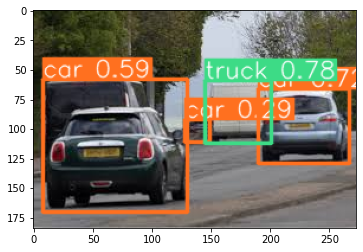

In [7]:
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()


--RealTime detections

# --RealTime detections

In [11]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    results = model(frame)
    
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

# -- Train drowsiness model

In [13]:
import uuid
import os
import time

In [14]:
IMAGES_PATH = os.path.join('data', 'images')
labels = ['awake', 'drowsy']
number_imgs = 20

In [19]:
cap = cv2.VideoCapture(0)
for label in labels:
    print('Collecting images for {}'.format(label))
    time.sleep(5)
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        ret, frame = cap.read()
        
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        cv2.imwrite(imgname, frame)
        cv2.imshow('image Collection', frame)
        time.sleep(2)
        
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()        
        
        

In [20]:
!git clone https://github.com/tzutalin/labelImg

Cloning into 'labelImg'...


In [21]:
!pip install pyqt5 lxml --upgrade
!cd labelImg && pyrcc5 -o libs/resources.py resources.qrc

ERROR: spyder 4.0.1 requires pyqtwebengine<5.13; python_version >= "3", which is not installed.
ERROR: spyder 4.0.1 has requirement pyqt5<5.13; python_version >= "3", but you'll have pyqt5 5.15.6 which is incompatible.
ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Erişim engellendi: 'C:\\Users\\Necati\\anaconda3\\Lib\\site-packages\\PyQt5\\QtCore.pyd'
Consider using the `--user` option or check the permissions.

Traceback (most recent call last):
  File "C:\Users\Necati\anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\Necati\anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\Necati\anaconda3\lib\site-packages\PyQt5\pyrcc_main.py", line 23, in <module>
    from .pyrcc import *
ImportError: DLL load failed: Belirtilen yordam bulunamadı.


# Loading Model